In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 설문 스키마
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [41]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv')
mcq.shape

(16716, 228)

응답 수가 16716개 인 것을 확인

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# missingno 모듈 설치
!pip install missingno

<AxesSubplot:>

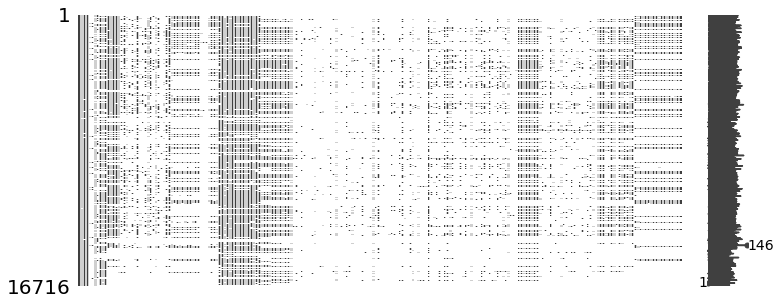

In [8]:
# missingno -> NaN 데이터들에 대해 시각화
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

# 시각화(흰 공간이 NaN 데이터)
msno.matrix(mcq, figsize=(12,5))

# 성별에 따라 그래프 그리기(use countplot)

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

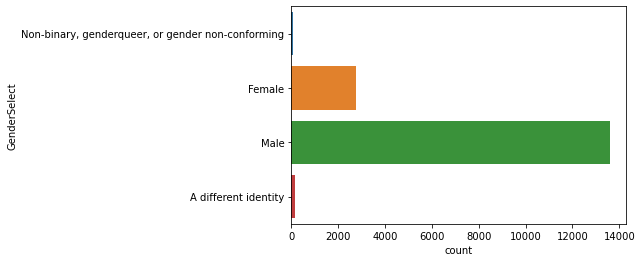

In [9]:
# y축이 범례가 된다, y -> x로 하면 x축이 범례
sns.countplot(y="GenderSelect",data=mcq)

남성의 응답수가 훨씬 높음

# Country를 기준으로 분석

In [10]:
# describe는 해당 column의 대략적인 정보를 보여줌
mcq["Country"].describe()

count             16595
unique               52
top       United States
freq               4197
Name: Country, dtype: object

In [11]:
# pandas를 사용하여 Country를 기준 index로 지정
country_df = pd.DataFrame(mcq["Country"].value_counts())

# 해당 index와 같은 열을 '국가'라는 column으로 추가
country_df['국가'] = country_df.index

country_df.columns = ['응답수','국가']

# 기존 인덱스 삭제
country_df = country_df.reset_index().drop('index',axis=1)
country_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


# 나이에 따라 그래프 그리기(use distplot)

<AxesSubplot:xlabel='Age', ylabel='Density'>

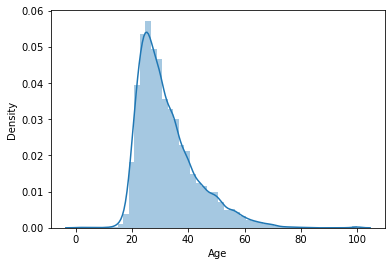

In [12]:
# mask를 사용하여 age가 0보다 큰 값들만 사용
sns.distplot(mcq[mcq["Age"]>0]["Age"])

# FormalEducation 그래프 그리기

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

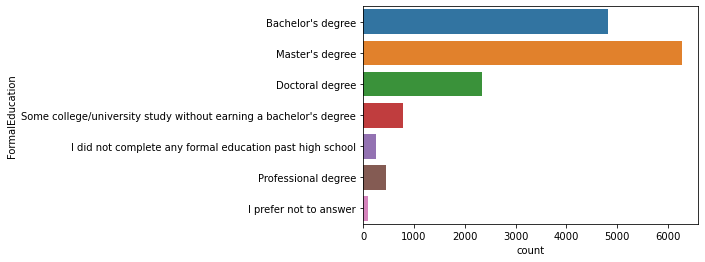

In [13]:
sns.countplot(y="FormalEducation",data=mcq)

# 전공에 따라 분석

In [14]:
mcq_major_count = pd.DataFrame(mcq["MajorSelect"].value_counts())

# 해당 값들을 정규화 하여 보여줌
mcq_major_percent = pd.DataFrame(mcq["MajorSelect"].value_counts(normalize=True))

# merge를 사용하여 위 두개의 df를 하나로 합쳐줌
mcq_major_df = mcq_major_count.merge(mcq_major_percent,left_index=True,right_index=True)
mcq_major_df.columns = ['응답수','비율']
mcq_major_df['비율'] = mcq_major_df['비율']*100
mcq_major_df

,응답수,비율
Computer Science,4397,33.107447
Mathematics or statistics,2220,16.715609
Engineering (non-computer focused),1339,10.082072
Electrical Engineering,1303,9.811008
Other,848,6.385061
Physics,830,6.249529
"Information technology, networking, or system administration",693,5.217981
A social science,531,3.998193
Biology,274,2.063098
Management information systems,237,1.784504


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

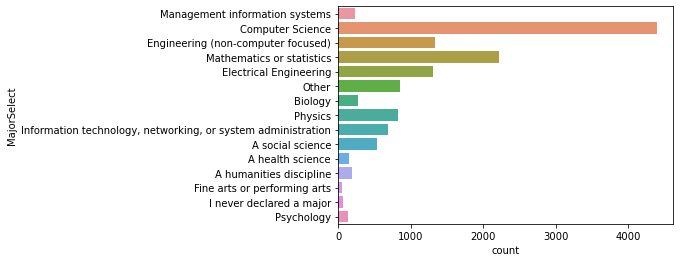

In [15]:
sns.countplot(y = "MajorSelect",data = mcq)

# 현재 고용 상태에 따라 분석

In [16]:
mcq_es_count = pd.DataFrame(mcq["EmploymentStatus"].value_counts())

# 해당 값들을 정규화 하여 보여줌
mcq_es_percent = pd.DataFrame(mcq["EmploymentStatus"].value_counts(normalize=True))

# merge를 사용하여 위 두개의 df를 하나로 합쳐줌
mcq_es_df = mcq_es_count.merge(mcq_es_percent,left_index=True,right_index=True)
mcq_es_df.columns = ['응답수','비율']
mcq_es_df['비율'] = mcq_es_df['비율']*100
mcq_es_df

,응답수,비율
Employed full-time,10897,65.189040
"Not employed, but looking for work",2110,12.622637
"Independent contractor, freelancer, or self-employed",1330,7.956449
"Not employed, and not looking for work",924,5.527638
Employed part-time,917,5.485762
I prefer not to say,420,2.512563
Retired,118,0.705911


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

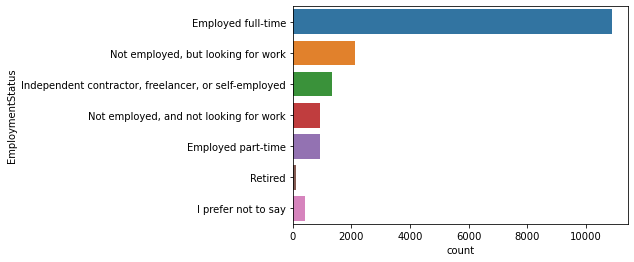

In [17]:
sns.countplot(y="EmploymentStatus",data = mcq)

# 코딩 경험 여부

<AxesSubplot:xlabel='count', ylabel='Tenure'>

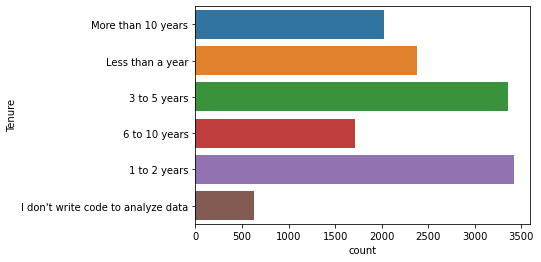

In [18]:
sns.countplot(y='Tenure', data=mcq)

# 한국의 결과 분석

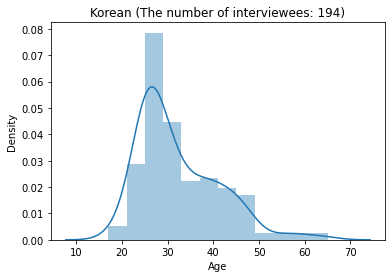

In [19]:
kor = mcq.loc[mcq['Country']=="South Korea"]

# dropna() -> NaN 데이터 삭제
sns.distplot(kor["Age"].dropna())
plt.title(f"Korean (The number of interviewees: {kor.shape[0]})")
plt.show()

,GenderSelect
Male,156
Female,37
A different identity,1


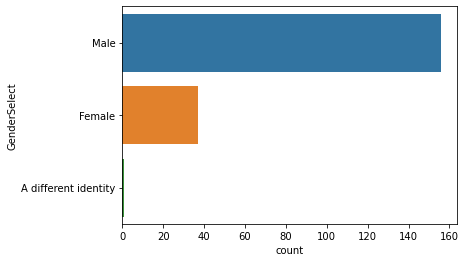

In [20]:
sns.countplot(y="GenderSelect",data=kor)
pd.DataFrame(kor["GenderSelect"].value_counts())

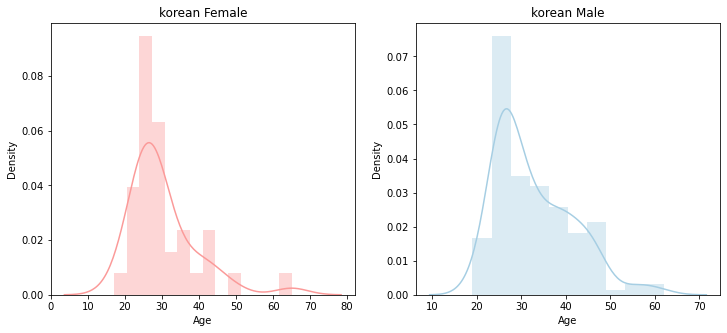

In [21]:
# 한개의 figure에 2개의 graph 그리기
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(kor['Age'].loc[kor['GenderSelect']=='Female'].dropna(),color=sns.color_palette("Paired")[4], ax=ax1)
ax1.set_title('korean Female')

sns.distplot(kor['Age'].loc[kor['GenderSelect']=='Male'].dropna(),color=sns.color_palette("Paired")[0], ax=ax2)
ax2.set_title('korean Male')
plt.show()

In [22]:
kor['EmploymentStatus'].describe()

count                    194
unique                     7
top       Employed full-time
freq                     116
Name: EmploymentStatus, dtype: object

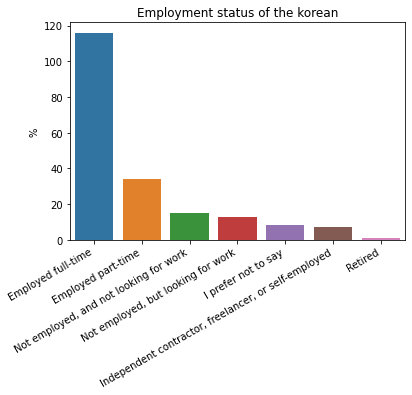

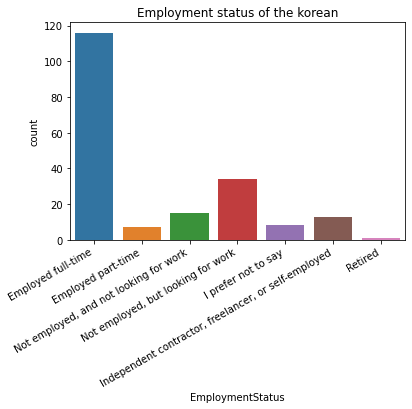

Employed full-time                                      116
Not employed, but looking for work                       34
Not employed, and not looking for work                   15
Independent contractor, freelancer, or self-employed     13
I prefer not to say                                       8
Employed part-time                                        7
Retired                                                   1
Name: EmploymentStatus, dtype: int64

In [39]:
# 밑에 방법은 value_counts()의 결과 순서대로 들어가기 때문에, column값과 일치하지 않는다.
sns.barplot(x=kor["EmploymentStatus"].unique(), y=kor["EmploymentStatus"].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('%')
plt.show()

# countplot을 사용하는게 더 정확
sns.countplot(x= kor["EmploymentStatus"].dropna(),data = kor)
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.show()

# 값 직접 확인해보기
kor['EmploymentStatus'].value_counts()

# 자주 묻는 질문 FAQ

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

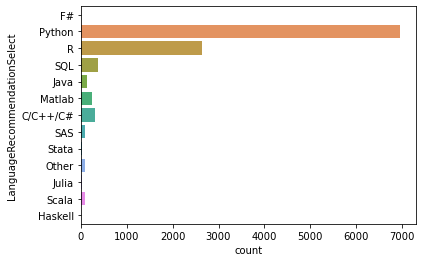

In [42]:
sns.countplot(y="LanguageRecommendationSelect",data=mcq)

파이썬을 가장 선호

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

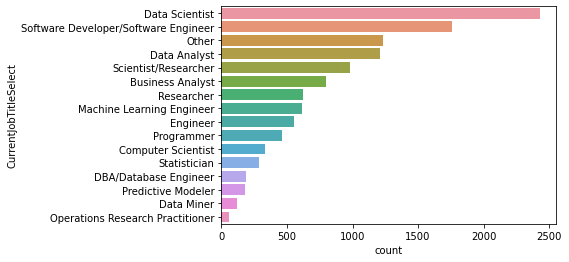

In [110]:
sns.countplot(y="CurrentJobTitleSelect",data=mcq,order =mcq.CurrentJobTitleSelect.value_counts().index)

데이터 사이언티스트가 가장 많음

In [64]:
# 대답 없는 경우 생략
print(f"총{mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape[0]}명")
print(mcq['CurrentJobTitleSelect'].describe())

총11830명
count              11830
unique                16
top       Data Scientist
freq                2433
Name: CurrentJobTitleSelect, dtype: object


# 파이썬과 R을 사용하는 사람 통계

### Q1. Python과 R중 어떤 언어를 배워야 할까요?

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

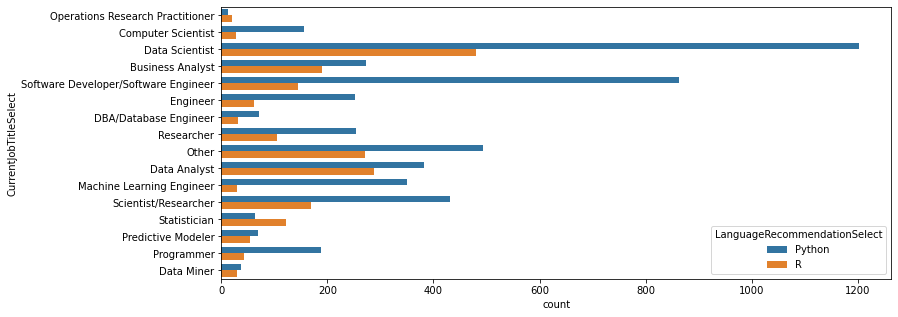

In [77]:
# mask를 사용하여 조건 설정
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect']=="Python") | (mcq['LanguageRecommendationSelect']=="R"))]

plt.figure(figsize=(12,5))
sns.countplot(y="CurrentJobTitleSelect",hue="LanguageRecommendationSelect",data=data)

### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

In [82]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent,left_index=True,right_index=True).head(20)

mcq_ml_tool_df.columns = ["응답 수","비율"]
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


텐서플로우를 내년에 가장 흥미로운 기술이 될 것이라 응답

<AxesSubplot:xlabel='응답 수'>

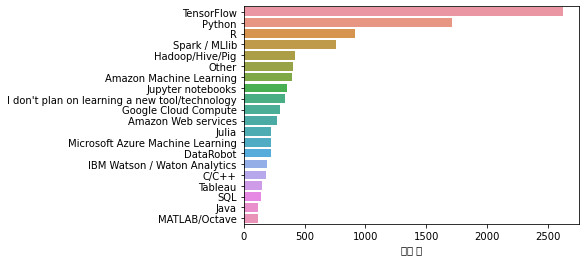

In [105]:
sns.barplot(y=mcq_ml_tool_df.index,x=mcq_ml_tool_df["응답 수"])

### 다음 해에 주목할 만한 Data Science Methods

<AxesSubplot:xlabel='count', ylabel='MLMethodNextYearSelect'>

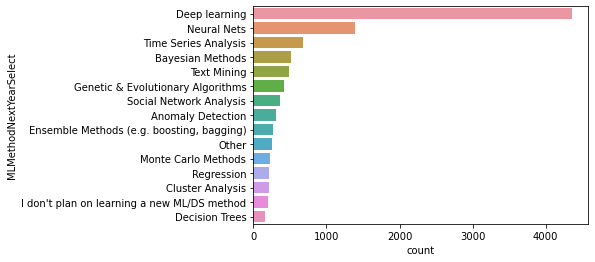

In [108]:
# countplot으로 상위 15개 불러오기
sns.countplot(y="MLMethodNextYearSelect",data=mcq,order=mcq.MLMethodNextYearSelect.value_counts().iloc[:15].index)

# Q3. 어디에서 데이터 사이언스를 배워야할까요?

In [115]:
pd.DataFrame(mcq['LearningPlatformSelect'].dropna())

,LearningPlatformSelect
0,"College/University,Conferences,Podcasts,Trade ..."
1,Kaggle
2,"Arxiv,College/University,Kaggle,Online courses..."
3,"Blogs,College/University,Conferences,Friends n..."
4,"Arxiv,Conferences,Kaggle,Textbook"
...,...
16664,"Arxiv,College/University,Kaggle,Personal Proje..."
16681,"Arxiv,Conferences,Kaggle,Online courses,Person..."
16687,"Blogs,Conferences,Kaggle,Online courses,YouTub..."
16704,"College/University,Conferences,Friends network..."
